In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('data/supplier_chain_processing.csv')

In [3]:
df

,Type,Delivery Status,Category Name,Customer Country,Customer Segment,Customer Street,Department Name,Latitude,Longitude,Market,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Disruption_Risk,Shipping_Delay_Days
0,DEBIT,Advance shipping,Sporting Goods,Puerto Rico,Consumer,5365 Noble Nectar Island,Fitness,18.251453,-66.037056,Pacific Asia,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,Smart watch,327.750000,2/3/2018 22:56,Standard Class,1,-1
1,TRANSFER,Late delivery,Sporting Goods,Puerto Rico,Consumer,2679 Rustic Loop,Fitness,18.279451,-66.037064,Pacific Asia,...,-249.089996,South Asia,Rajastán,PENDING,Smart watch,327.750000,1/18/2018 12:27,Standard Class,2,1
2,CASH,Shipping on time,Sporting Goods,EE. UU.,Consumer,8510 Round Bear Gate,Fitness,37.292233,-121.881279,Pacific Asia,...,-247.779999,South Asia,Rajastán,CLOSED,Smart watch,327.750000,1/17/2018 12:06,Standard Class,1,0
3,DEBIT,Advance shipping,Sporting Goods,EE. UU.,Home Office,3200 Amber Bend,Fitness,34.125946,-118.291016,Pacific Asia,...,22.860001,Oceania,Queensland,COMPLETE,Smart watch,327.750000,1/16/2018 11:45,Standard Class,1,-1
4,PAYMENT,Advance shipping,Sporting Goods,Puerto Rico,Corporate,8671 Iron Anchor Corners,Fitness,18.253769,-66.037048,Pacific Asia,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,Smart watch,327.750000,1/15/2018 11:24,Standard Class,1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,EE. UU.,Home Office,1322 Broad Glade,Fan Shop,40.640930,-73.942711,Pacific Asia,...,40.000000,Eastern Asia,Shanghái,CLOSED,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 3:40,Standard Class,1,0
180515,DEBIT,Late delivery,Fishing,EE. UU.,Corporate,7330 Broad Apple Moor,Fan Shop,35.362545,-119.018700,Pacific Asia,...,-613.770019,Eastern Asia,Osaka,COMPLETE,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/19/2016 1:34,Second Class,2,1
180516,TRANSFER,Late delivery,Fishing,EE. UU.,Corporate,97 Burning Landing,Fan Shop,41.629959,-72.967155,Pacific Asia,...,141.110001,Oceania,Australia del Sur,PENDING,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/20/2016 21:00,Standard Class,2,1
180517,PAYMENT,Advance shipping,Fishing,Puerto Rico,Consumer,2585 Silent Autumn Landing,Fan Shop,18.213350,-66.370575,Pacific Asia,...,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,1/18/2016 20:18,Standard Class,1,-1


In [4]:
df.shape

(180519, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        180519 non-null  object 
 1   Delivery Status             180519 non-null  object 
 2   Category Name               180519 non-null  object 
 3   Customer Country            180519 non-null  object 
 4   Customer Segment            180519 non-null  object 
 5   Customer Street             180519 non-null  object 
 6   Department Name             180519 non-null  object 
 7   Latitude                    180519 non-null  float64
 8   Longitude                   180519 non-null  float64
 9   Market                      180519 non-null  object 
 10  Order Customer Id           180519 non-null  int64  
 11  order date (DateOrders)     180519 non-null  object 
 12  Order Item Discount         180519 non-null  float64
 13  Order Item Dis

In [6]:
df['Order Item Quantity'].value_counts()

Order Item Quantity
1    99134
5    20385
3    20350
4    20335
2    20315
Name: count, dtype: int64

In [7]:
df['Shipping_Delay_Days'].value_counts()

Shipping_Delay_Days
 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: count, dtype: int64

In [8]:
df['Order Profit Per Order'].value_counts()

Order Profit Per Order
 0.000000      1177
 143.990005     199
 72.000000      194
 46.799999      188
 24.000000      181
               ... 
-212.410004       1
-18.959999        1
 177.169998       1
 130.979996       1
-196.179993       1
Name: count, Length: 21998, dtype: int64

In [9]:
df['Order Profit Per Order'].round(2)

0          91.25
1        -249.09
2        -247.78
3          22.86
4         134.21
           ...  
180514     40.00
180515   -613.77
180516    141.11
180517    186.23
180518    168.95
Name: Order Profit Per Order, Length: 180519, dtype: float64

In [10]:
df['Order Item Product Price'].value_counts()

Order Item Product Price
59.990002      24820
129.990005     22372
50.000000      21035
49.980000      19298
399.980011     17325
               ...  
349.989990        40
329.989990        27
599.989990        21
1999.989990       15
999.989990        10
Name: count, Length: 75, dtype: int64

In [11]:
df['Order Item Product Price'] = df['Order Item Product Price'].round(2)


In [12]:
df['Order Item Product Price'].value_counts()

Order Item Product Price
59.99      24820
129.99     22372
50.00      21035
49.98      19298
399.98     17325
           ...  
349.99        40
329.99        27
599.99        21
1999.99       15
999.99        10
Name: count, Length: 75, dtype: int64

In [13]:
df['Latitude']=df['Latitude'].round(2)

In [14]:
df['Latitude'].value_counts()

Latitude
18.23    8356
18.25    7393
18.22    6544
18.26    6355
18.29    6273
         ... 
30.59       1
34.77       1
38.44       1
41.18       1
28.59       1
Name: count, Length: 1224, dtype: int64

In [15]:
df['Latitude']=df['Latitude'].round(2)

In [16]:
df['Latitude'].value_counts()

Latitude
18.23    8356
18.25    7393
18.22    6544
18.26    6355
18.29    6273
         ... 
30.59       1
34.77       1
38.44       1
41.18       1
28.59       1
Name: count, Length: 1224, dtype: int64

In [17]:
df['Longitude']=df['Longitude'].round(2)

In [18]:
df['Longitude'].value_counts()

Longitude
-66.37     58325
-66.04      4237
-66.05      1327
-66.03      1189
-73.94      1081
           ...  
-103.19        1
-92.18         1
-108.43        1
-92.21         1
-88.94         1
Name: count, Length: 1779, dtype: int64

Univariate analysis for numerical column


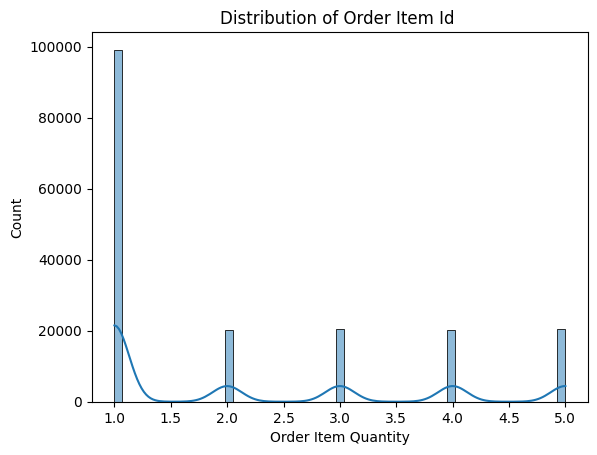

In [19]:
#histogram for order item id

sns.histplot(df['Order Item Quantity'],kde=True)
plt.title("Distribution of Order Item Id ")
plt.show()

# calculate the mean and median


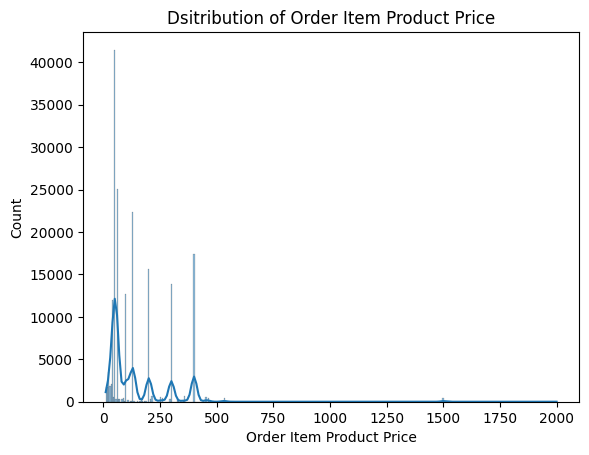

MEAN : 141.23254654634692
Median : 59.99


In [20]:
sns.histplot(df['Order Item Product Price'],kde=True)
plt.title("Dsitribution of Order Item Product Price")
plt.show()

# calculate mean and median 

Order_Item_Product_Price_mean=df['Order Item Product Price'].mean() 
Order_Item_Product_Price_median=df['Order Item Product Price'].median() 

print("MEAN :",Order_Item_Product_Price_mean)
print("Median :",Order_Item_Product_Price_median)


In [21]:
Q1 = df['Order Item Product Price'].quantile(0.25)
Q3 = df['Order Item Product Price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper


(np.float64(-174.985), np.float64(424.975))

In [22]:
((df['Order Item Product Price'] < lower) | 
 (df['Order Item Product Price'] > upper)).sum()


np.int64(2048)

In [23]:
df['Order Item Product Price'] = df['Order Item Product Price'].clip(lower, upper)


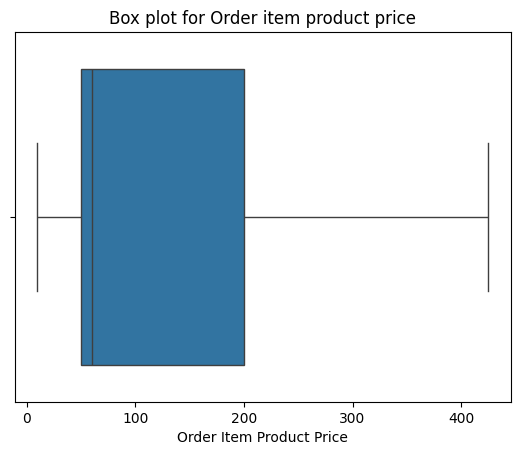

In [24]:
sns.boxplot(x=df['Order Item Product Price'])
plt.title('Box plot for Order item product price')
plt.show()

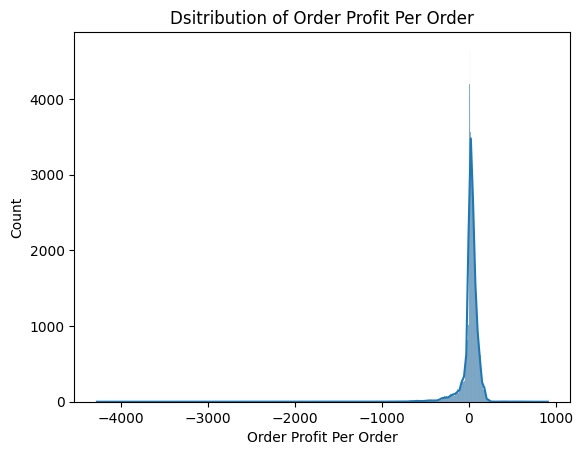

MEAN : 21.97498863859404
Median : 31.52000046


In [25]:
sns.histplot(df['Order Profit Per Order'],kde=True)
plt.title("Dsitribution of Order Profit Per Order")
plt.show()

# calculate mean and median 

Order_Profit_Per_Order_mean=df['Order Profit Per Order'].mean() 
Order_Profit_Per_Order_median=df['Order Profit Per Order'].median() 

print("MEAN :",Order_Profit_Per_Order_mean)
print("Median :",Order_Profit_Per_Order_median)


In [26]:
Q1 = df['Order Profit Per Order'].quantile(0.25)
Q3 = df['Order Profit Per Order'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower, upper


(np.float64(-79.70000457500001), np.float64(151.50000762500002))

In [27]:
((df['Order Profit Per Order'] < lower) | 
 (df['Order Profit Per Order'] > upper)).sum()

np.int64(18942)

In [28]:
df['Order Profit Per Order'] = df['Order Profit Per Order'].clip(lower, upper)


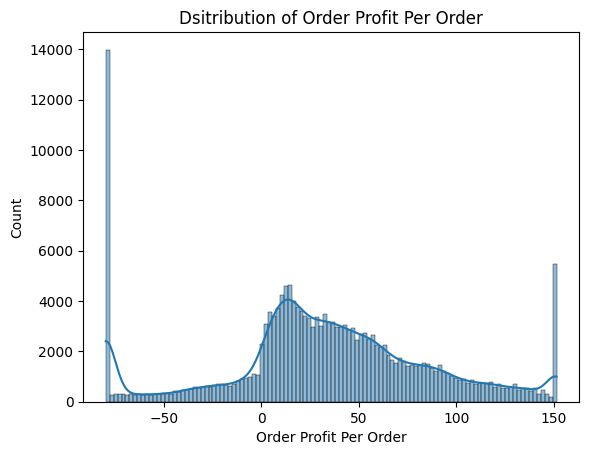

In [29]:
sns.histplot(df['Order Profit Per Order'],kde=True)
plt.title("Dsitribution of Order Profit Per Order")
plt.show()


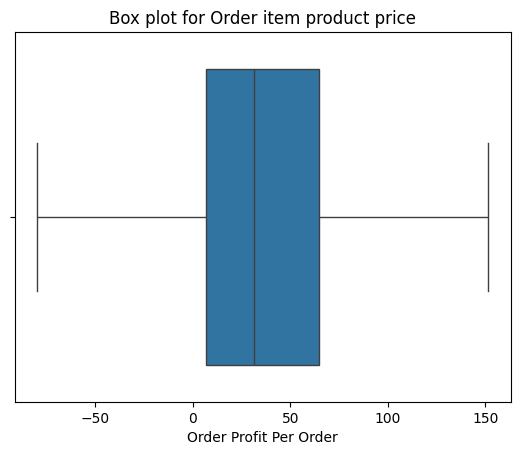

In [30]:
sns.boxplot(x=df['Order Profit Per Order'])
plt.title('Box plot for Order item product price')
plt.show()

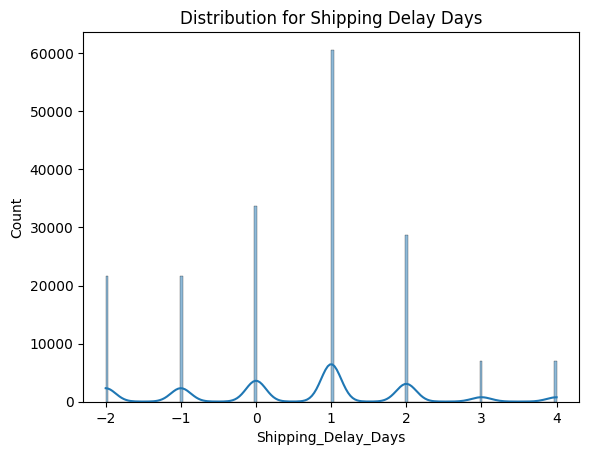

Mean: 0.5658074773292562
Median: 1.0


In [31]:
sns.histplot(df['Shipping_Delay_Days'],kde=True)
plt.title('Distribution for Shipping Delay Days')
plt.show()

Shipping_Delay_Days_mean=df['Shipping_Delay_Days'].mean()
Shipping_Delay_Days_median=df['Shipping_Delay_Days'].median()

print('Mean:', Shipping_Delay_Days_mean)
print('Median:',Shipping_Delay_Days_median)


In [32]:
Q1=df['Shipping_Delay_Days'].quantile(0.25)
Q3=df['Shipping_Delay_Days'].quantile(0.75)
IQR=Q3-Q1

lower=Q1 - 1.5*IQR
upper= Q3 + 1.5*IQR

lower,upper

(np.float64(-1.5), np.float64(2.5))

In [33]:
((df['Shipping_Delay_Days']<lower)| (df['Shipping_Delay_Days']>upper)).sum()

np.int64(35701)

In [34]:
df['Shipping_Delay_Days']=df['Shipping_Delay_Days'].clip(lower,upper)

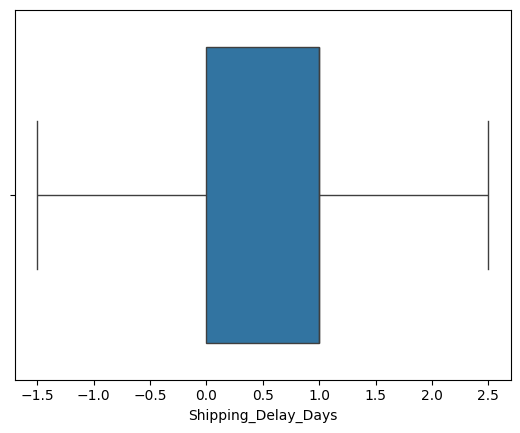

In [35]:
sns.boxplot(x=df['Shipping_Delay_Days'])
plt.show()

In [36]:
df.isnull().sum()

Type                          0
Delivery Status               0
Category Name                 0
Customer Country              0
Customer Segment              0
Customer Street               0
Department Name               0
Latitude                      0
Longitude                     0
Market                        0
Order Customer Id             0
order date (DateOrders)       0
Order Item Discount           0
Order Item Discount Rate      0
Order Item Product Price      0
Order Item Quantity           0
Sales                         0
Order Item Total              0
Order Profit Per Order        0
Order Region                  0
Order State                   0
Order Status                  0
Product Name                  0
Product Price                 0
shipping date (DateOrders)    0
Shipping Mode                 0
Disruption_Risk               0
Shipping_Delay_Days           0
dtype: int64

Label Encoding

In [37]:
object_columns=df.select_dtypes(include=['object']).columns

In [38]:
print(object_columns)

Index(['Type', 'Delivery Status', 'Category Name', 'Customer Country',
       'Customer Segment', 'Customer Street', 'Department Name', 'Market',
       'order date (DateOrders)', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'shipping date (DateOrders)',
       'Shipping Mode'],
      dtype='object')


In [39]:
import pickle

In [40]:
encoders={}

#apply label encoding and store the encoders
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder  # saving the encoder for this column
    
# save the encoders as a pickle file

with open('encoders.pkl','wb') as f:
    pickle.dump(encoders,f)

In [41]:
encoders

{'Type': LabelEncoder(),
 'Delivery Status': LabelEncoder(),
 'Category Name': LabelEncoder(),
 'Customer Country': LabelEncoder(),
 'Customer Segment': LabelEncoder(),
 'Customer Street': LabelEncoder(),
 'Department Name': LabelEncoder(),
 'Market': LabelEncoder(),
 'order date (DateOrders)': LabelEncoder(),
 'Order Region': LabelEncoder(),
 'Order State': LabelEncoder(),
 'Order Status': LabelEncoder(),
 'Product Name': LabelEncoder(),
 'shipping date (DateOrders)': LabelEncoder(),
 'Shipping Mode': LabelEncoder()}

Bivariate analysis

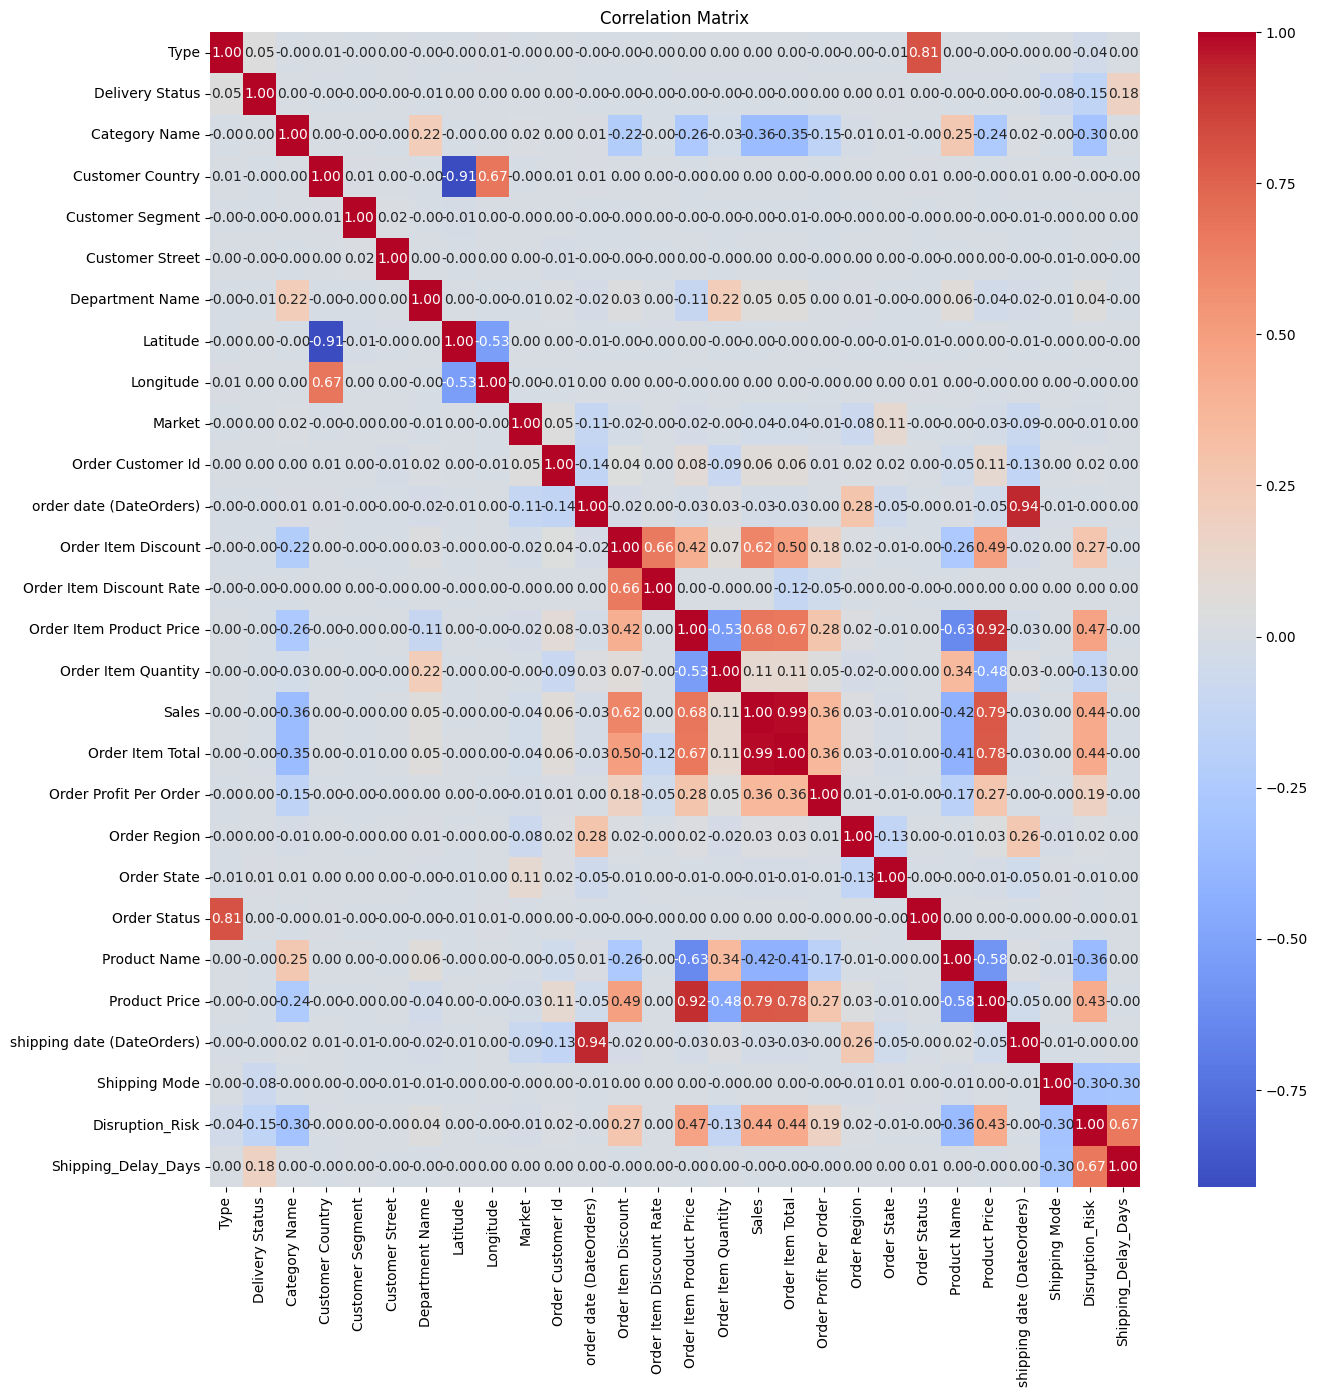

In [42]:
#correlation matrix


plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [43]:
# train test split

df.columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer Country',
       'Customer Segment', 'Customer Street', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order Customer Id', 'order date (DateOrders)',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode', 'Disruption_Risk',
       'Shipping_Delay_Days'],
      dtype='object')

In [44]:
X=df.drop(columns=['Disruption_Risk'])
Y=df['Disruption_Risk']

In [45]:
X

,Type,Delivery Status,Category Name,Customer Country,Customer Segment,Customer Street,Department Name,Latitude,Longitude,Market,...,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Shipping_Delay_Days
0,1,0,40,1,0,3683,4,18.25,-66.04,3,...,314.640015,91.250000,15,475,2,78,327.750000,27149,3,-1.0
1,3,1,40,1,0,1400,4,18.28,-66.04,3,...,311.359985,-79.700005,13,841,5,78,327.750000,2209,3,1.0
2,0,3,40,0,0,6217,4,37.29,-121.88,3,...,309.720001,-79.700005,13,841,1,78,327.750000,1980,3,0.0
3,1,0,40,0,2,1803,4,34.13,-118.29,3,...,304.809998,22.860001,11,835,2,78,327.750000,1752,3,-1.0
4,2,0,40,1,1,6345,4,18.25,-66.04,3,...,298.250000,134.210007,11,835,6,78,327.750000,1528,3,-1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,3,18,0,2,285,3,40.64,-73.94,3,...,399.980011,40.000000,7,913,1,24,399.980011,2733,3,0.0
180515,1,1,18,0,1,5261,3,35.36,-119.02,3,...,395.980011,-79.700005,7,770,2,24,399.980011,2339,2,1.0
180516,3,1,18,0,1,7208,3,41.63,-72.97,3,...,391.980011,141.110001,11,88,5,24,399.980011,2727,3,1.0
180517,2,0,18,1,0,1335,3,18.21,-66.37,3,...,387.980011,151.500008,11,88,6,24,399.980011,2114,3,-1.0


In [46]:
X.shape

(180519, 27)

In [47]:
Y

0         1
1         2
2         1
3         1
4         1
         ..
180514    1
180515    2
180516    2
180517    1
180518    1
Name: Disruption_Risk, Length: 180519, dtype: int64

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [49]:
X_train.shape

(144415, 27)

In [50]:
Y_train.shape

(144415,)

In [55]:
print(X_train.columns.tolist())


['Type', 'Delivery Status', 'Category Name', 'Customer Country', 'Customer Segment', 'Customer Street', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order Customer Id', 'order date (DateOrders)', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Product Name', 'Product Price', 'shipping date (DateOrders)', 'Shipping Mode', 'Shipping_Delay_Days']


In [51]:
Y_train.value_counts()

Disruption_Risk
1    71967
0    49799
2    22649
Name: count, dtype: int64

In [52]:
Y_test.value_counts()

Disruption_Risk
1    17998
0    12354
2     5752
Name: count, dtype: int64

MODEL TRAINING

In [53]:
models={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Randon Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [54]:
# dictionary to store cross validation results

cv_scores={}

# perform cross validation for each model

for model_name, model in models.items():
    print(f'training{model_name} with default parameters...')
    scores=cross_val_score(model,X_train,Y_train,cv=5,scoring='accuracy')
    cv_scores[model_name]=scores
    print(f'{model_name} Cross Validation Accuracy:{np.mean(scores):.2f}')
    print('-'*50)

trainingDecision Tree with default parameters...
Decision Tree Cross Validation Accuracy:0.99
--------------------------------------------------
trainingRandon Forest with default parameters...


KeyboardInterrupt: 

MODEL SELECTION AND Hyperparameter tuning

In [ ]:
# Initialize models
decision_tree= DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)

In [ ]:
final_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)


In [ ]:
final_model.fit(X_train,Y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
Y_pred = final_model.predict(X_test)

print("Test Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Test Accuracy: 0.9756259694216707

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12354
           1       0.96      0.99      0.98     17998
           2       0.98      0.87      0.92      5752

    accuracy                           0.98     36104
   macro avg       0.98      0.95      0.97     36104
weighted avg       0.98      0.98      0.98     36104



In [ ]:
train_pred = final_model.predict(X_train)
test_pred  = final_model.predict(X_test)

train_acc = accuracy_score(Y_train, train_pred)
test_acc  = accuracy_score(Y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Training Accuracy: 0.9866426617733615
Test Accuracy: 0.9756259694216707


Save the final model & encoders

In [ ]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)
